In [1]:
import warnings

# Suppress the specific RuntimeWarnings from lazy_loader
warnings.filterwarnings("ignore", category=RuntimeWarning, module="lazy_loader")


In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from residual import excitation
from gausswin import gaussian
from vlropHEofLPres import helpres
from vlrop_excitation import VOP_exi
from vlrop_zerofrequency import zerofrequency

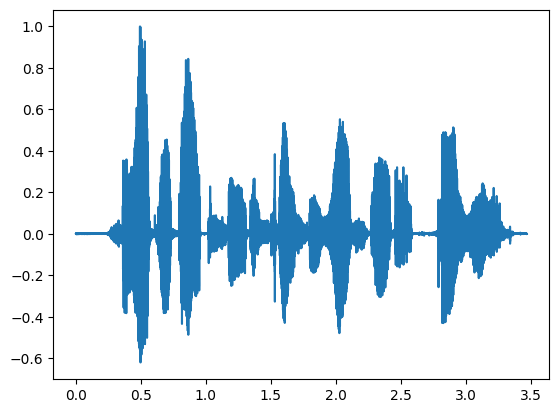

In [3]:
# Display the audio file
# Load the audio file
file_path = 'merged/10115.wav'
y, sr = librosa.load(file_path, sr=8000, mono=True)


# Normalize the audio
y = y - np.mean(y)
y = y / np.max(np.abs(y))

# Create the time vector
t1 = np.arange(0, len(y)) / sr

# Plot the audio
# librosa.display.waveshow(y, sr=sr)
plt.plot(t1,y)
plt.show()


In [4]:
# Compute the hilbert enevolpe of residual signal and initializing FOGD operator
res,hilenv=excitation(y,sr)
winlength=6
THexivlrop=0.01

In [5]:
len(hilenv)

27751

# VOP Evidence

In [6]:
G,Gd=gaussian(800+1,133+1)

# Retrive VOP evidence of Hilbert Envelope of LP Residual Signal;
EVIvlrop_he = helpres(hilenv,sr,Gd)

In [7]:
len(EVIvlrop_he)

27751

In [8]:
# Retrieve VOP evidence of Zero Frequency Filtered Output of Signal
EVIvlrop_zf1,zffo,gclocssp1,excccont2d1 = zerofrequency(y,winlength,sr,Gd,1)

In [9]:
len(EVIvlrop_zf1)

27751

In [10]:

# VOP from excitation source
EVIvlrop1,vlrop1,total_vlrop1,PP11=VOP_exi(y,EVIvlrop_he,EVIvlrop_zf1,0,0,0,0,THexivlrop,0)

# VEP Evidence

In [11]:
G,Gd=gaussian(800+1,133+1)
Gd_flipped=np.flip(Gd)

# Retrive VOP evidence of Hilbert Envelope of LP Residual Signal;
EVIvlrep_he = helpres(hilenv,sr,Gd_flipped)

In [12]:
# Retrieve VOP evidence of Zero Frequency Filtered Output of Signal
EVIvlrep_zf1,zffo,gclocssp1,excccont2d1 = zerofrequency(y,winlength,sr,Gd_flipped,1)

In [13]:

# VOP from excitation source
EVIvlrep1,vlrep1,total_vlrep1,PP22=VOP_exi(y,EVIvlrep_he,EVIvlrep_zf1,0,0,0,0,THexivlrop,0)

# Plotting

In [14]:
len(EVIvlrep1),len(EVIvlrop1)

(27751, 27751)

In [15]:
len(PP22),len(PP11)

(26, 22)

In [16]:
PP1=np.array([0]*len(y))
PP2=np.array([0]*len(y))

PP1[PP11]=1
PP2[PP22]=1

In [17]:
op=0
past=0

for i in range(len(y)):

    if PP1[i]==1 and op==0:
        op=1
        continue
    if PP1[i]==1 and op==1:
        PP1[i]=0
        continue

    if PP2[i]==1 and op==1:
        op=0
        past=i
        continue

    if PP2[i]==1 and op==0:
        PP2[past]=0
        past=i


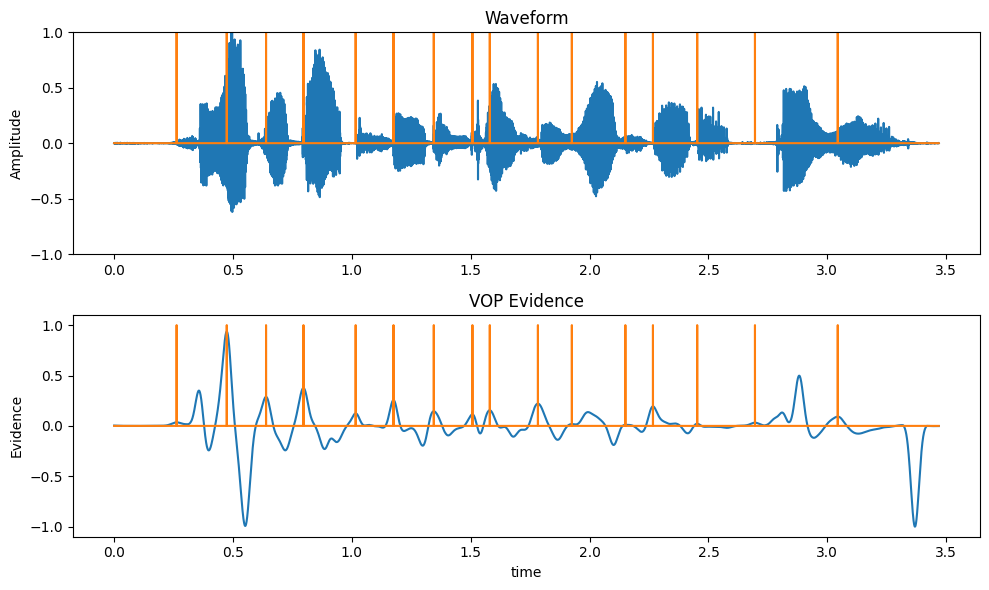

In [18]:
# VOP 

# Create a figure with two subplots arranged in a 1x2 grid
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Plot data in the first subplot
axes[0].plot(t1, y)
axes[0].plot(t1,PP1)
axes[0].set_ylim(-1,1)
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Waveform')
# axes[0].legend()

# Plot data in the second subplot
axes[1].plot(t1, EVIvlrop1)
axes[1].plot(t1,PP1)
axes[1].set_xlabel('time')
axes[1].set_ylabel('Evidence')
axes[1].set_title('VOP Evidence')
# axes[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [19]:
print("VOP indices : ", np.where(PP1==1)[0])
print("VEP indices : ", np.where(PP2==1)[0])

VOP indices :  [ 2103  3790  5112  6371  8128  9401 10757 12057 12642 14261 15403 17204
 18132 19621 21565 24351]
VEP indices :  [ 3181  4409  5757  7486  9037 10381 11241 12315 13777 14923 16806 17749
 19302 20616 23546 26947]


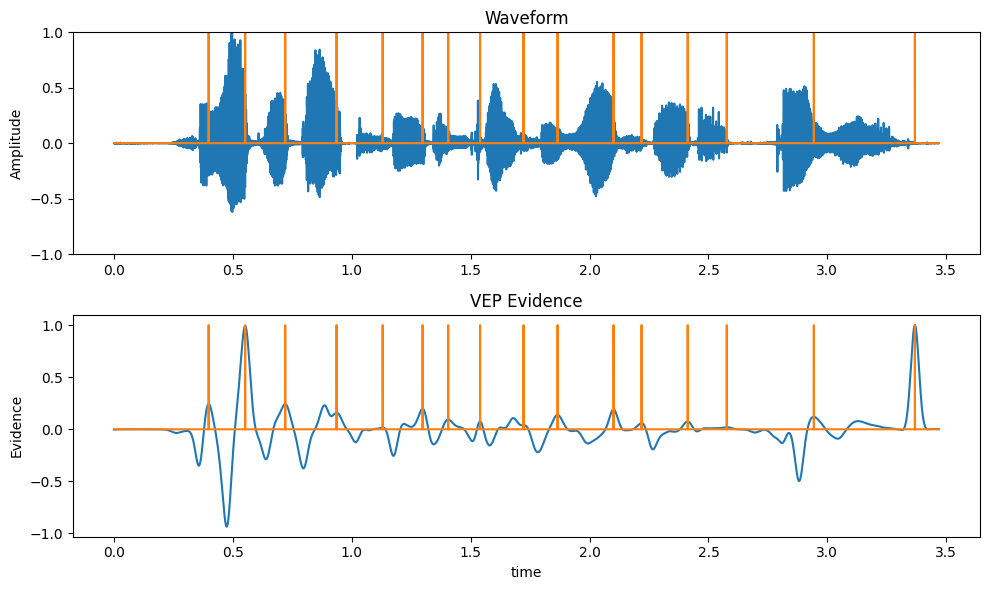

In [20]:
# VEP 

# Create a figure with two subplots arranged in a 1x2 grid
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Plot data in the first subplot
axes[0].plot(t1, y)
axes[0].plot(t1, PP2)
axes[0].set_ylim(-1,1)
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Waveform')
# axes[0].legend()

# Plot data in the second subplot
axes[1].plot(t1, EVIvlrep1)
axes[1].plot(t1, PP2)
axes[1].set_xlabel('time')
axes[1].set_ylabel('Evidence')
axes[1].set_title('VEP Evidence')
# axes[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [21]:
import os